In [1]:
from datascience import *
from path_data_variable import *
import numpy as np
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

In [2]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def residual(table, x, y):
    return table.column(y) - fit(table, x, y)

def scatter_fit(table, x, y):
    plots.scatter(table.column(x), table.column(y), s=20)
    plots.plot(table.column(x), fit(table, x, y), lw=2, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)

In [3]:
def draw_and_compare(true_slope, true_int, sample_size):
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    eps = np.random.normal(0, 6, sample_size)
    y = (true_slope*x + true_int) + eps
    tyche = Table().with_columns(
        'x', x,
        'y', y
    )

    plots.figure(figsize=(6, 16))
    plots.subplot(4, 1, 1)
    plots.scatter(tyche['x'], tyche['y'], s=20)
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title('True Line, and Points Created')

    plots.subplot(4, 1, 2)
    plots.scatter(tyche['x'],tyche['y'], s=20)
    plots.title('What We Get to See')

    plots.subplot(4, 1, 3)
    scatter_fit(tyche, 'x', 'y')
    plots.xlabel("")
    plots.ylabel("")
    plots.title('Regression Line: Estimate of True Line')

    plots.subplot(4, 1, 4)
    scatter_fit(tyche, 'x', 'y')
    plots.ylabel("")
    xlims = np.array([np.min(tyche['x']), np.max(tyche['x'])])
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title("Regression Line and True Line")

In [4]:
baby = Table.read_table(path_data + 'baby.csv')

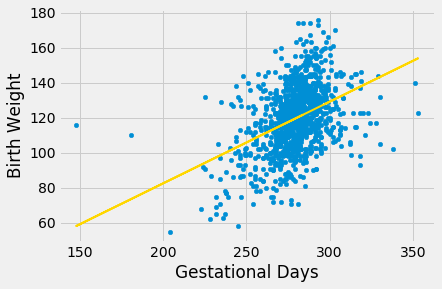

In [5]:
scatter_fit(baby, 'Gestational Days', 'Birth Weight')

In [6]:
correlation(baby, 'Gestational Days', 'Birth Weight')

0.40754279338885108

In [7]:
slope(baby, 'Gestational Days', 'Birth Weight')

0.46655687694921522

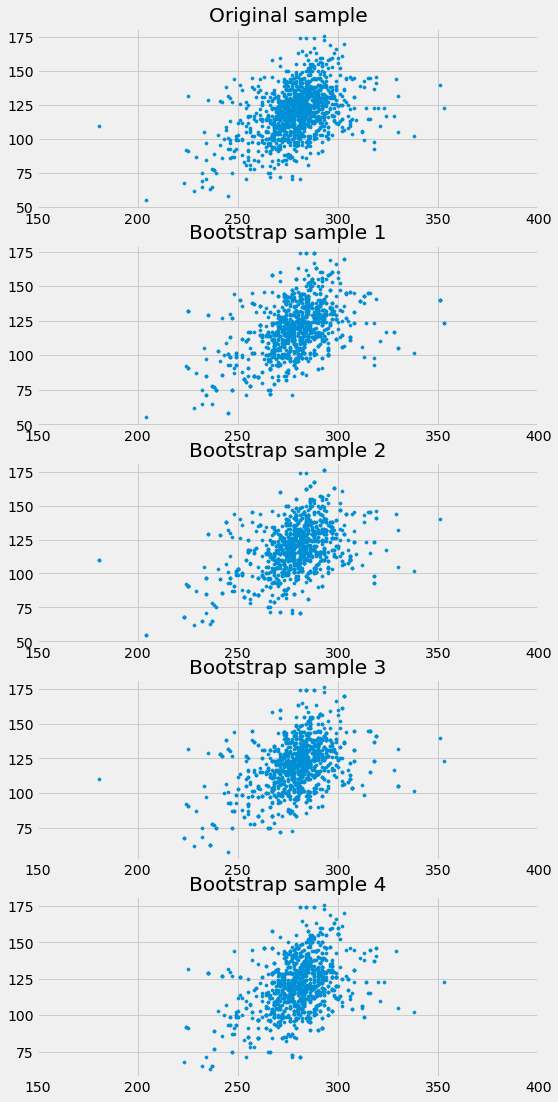

In [8]:
plots.figure(figsize=(8, 18))
plots.subplot(5, 1, 1)
plots.scatter(baby[1], baby[0], s=10)
plots.xlim([150, 400])
plots.title('Original sample')

for i in np.arange(1, 5, 1):
    plots.subplot(5,1,i+1)
    rep = baby.sample(with_replacement=True)
    plots.scatter(rep[1], rep[0], s=10)
    plots.xlim([150, 400])
    plots.title('Bootstrap sample '+str(i))

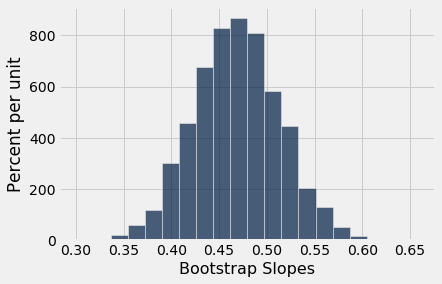

In [9]:
slopes = make_array()
for i in np.arange(5000):
    bootstrap_sample = baby.sample()
    bootstrap_slope = slope(bootstrap_sample, 'Gestational Days', 'Birth Weight')
    slopes = np.append(slopes, bootstrap_slope)
Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)

In [10]:
left = percentile(2.5, slopes)
right = percentile(97.5, slopes)
left, right

(0.38169251837495338, 0.55839374914417184)

In [11]:
def bootstrap_slope(table, x, y, repetitions):
    
    # For each repetition:
    # Bootstrap the scatter, get the slope of the regression line,
    # augment the list of generated slopes
    slopes = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = table.sample()
        bootstrap_slope = slope(bootstrap_sample, x, y)
        slopes = np.append(slopes, bootstrap_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(table, x, y)
    
    # Display results
    Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)
    plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print('Slope of regression line:', observed_slope)
    print('Approximate 95%-confidence interval for the true slope:')
    print(left, right)

Slope of regression line: 0.466556876949
Approximate 95%-confidence interval for the true slope:
0.380373502308 0.558711930778


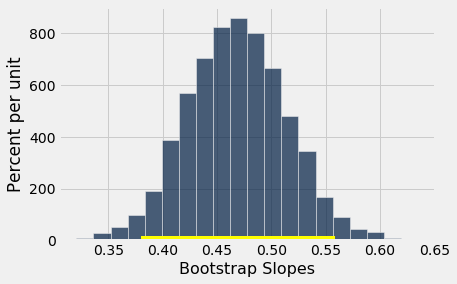

In [12]:
bootstrap_slope(baby, 'Gestational Days', 'Birth Weight', 5000)

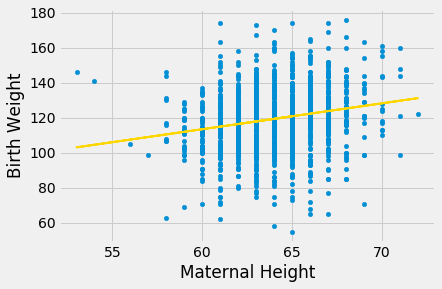

In [13]:
scatter_fit(baby, 'Maternal Height', 'Birth Weight')

In [14]:
correlation(baby, 'Maternal Height', 'Birth Weight')

0.20370417718968034

Slope of regression line: 1.47801935193
Approximate 95%-confidence interval for the true slope:
1.06617289982 1.91237018475


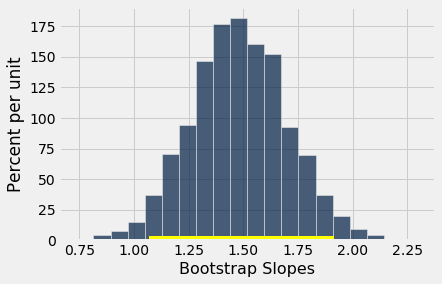

In [15]:
bootstrap_slope(baby, 'Maternal Height', 'Birth Weight', 5000)

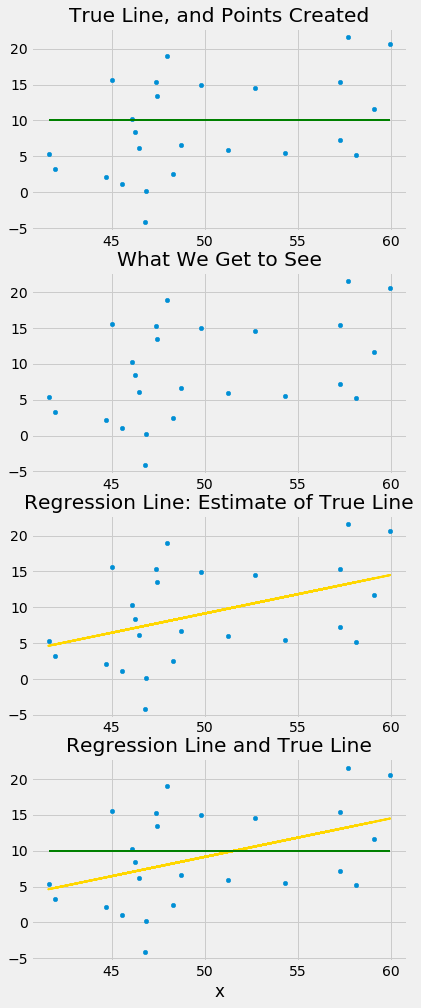

In [16]:
draw_and_compare(0, 10, 25)

In [17]:
slope(baby, 'Maternal Age', 'Birth Weight')

0.085007669415825132

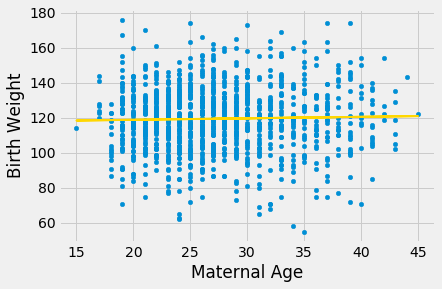

In [18]:
scatter_fit(baby, 'Maternal Age', 'Birth Weight')

Slope of regression line: 0.0850076694158
Approximate 95%-confidence interval for the true slope:
-0.104436940365 0.276512953946


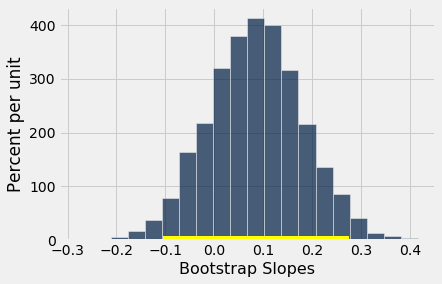

In [19]:
bootstrap_slope(baby, 'Maternal Age', 'Birth Weight', 5000)